<h3>Project Week 01</h3>
<p>名企BI班 week1 谢雅楠 20200825</p>

<h4>Thinking</h4>
<p>1.既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢?<br/> → 协同过滤可以同时在用户行为中提取规律。</p>
<p>2.你需要推荐系统么?哪些情况下不需要推荐系统?<br/> → a.需要推荐系统。<br/> → b.不希望自己在交友软件中“被推荐”给别人；专注阅读公众号文章中插入广告推荐；购物网站过多推荐相似商品；网站互相出售用户个人信息感受到隐私被侵犯；基于历史行为的推荐多，挖掘新需求的推荐少</p>
<p>3.如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题?<br/> → 歌词作为噪声被作为文本进行分析</p>
<h4>Action</h4>


In [1]:
"""
MNIST (handwritten digits) classification
using CART model in sklearn

ref.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
"""

# import packages
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt

In [2]:
# Load the data
digits = load_digits(return_X_y=False,as_frame=True)
data = digits.data

print("Target names: \n", digits.target_names)
print("\nTargets: \n", digits.target, "\n\nData Frame:")
data

Target names: 
 [0 1 2 3 4 5 6 7 8 9]

Targets: 
 0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64 

Data Frame:


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


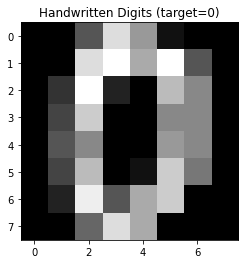

In [3]:
# Plot the first image
plt.gray()

plt.title('Handwritten Digits (target='+ str(digits.target[0])+")")
plt.imshow(digits.images[0])
plt.show()

In [4]:
# Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25)

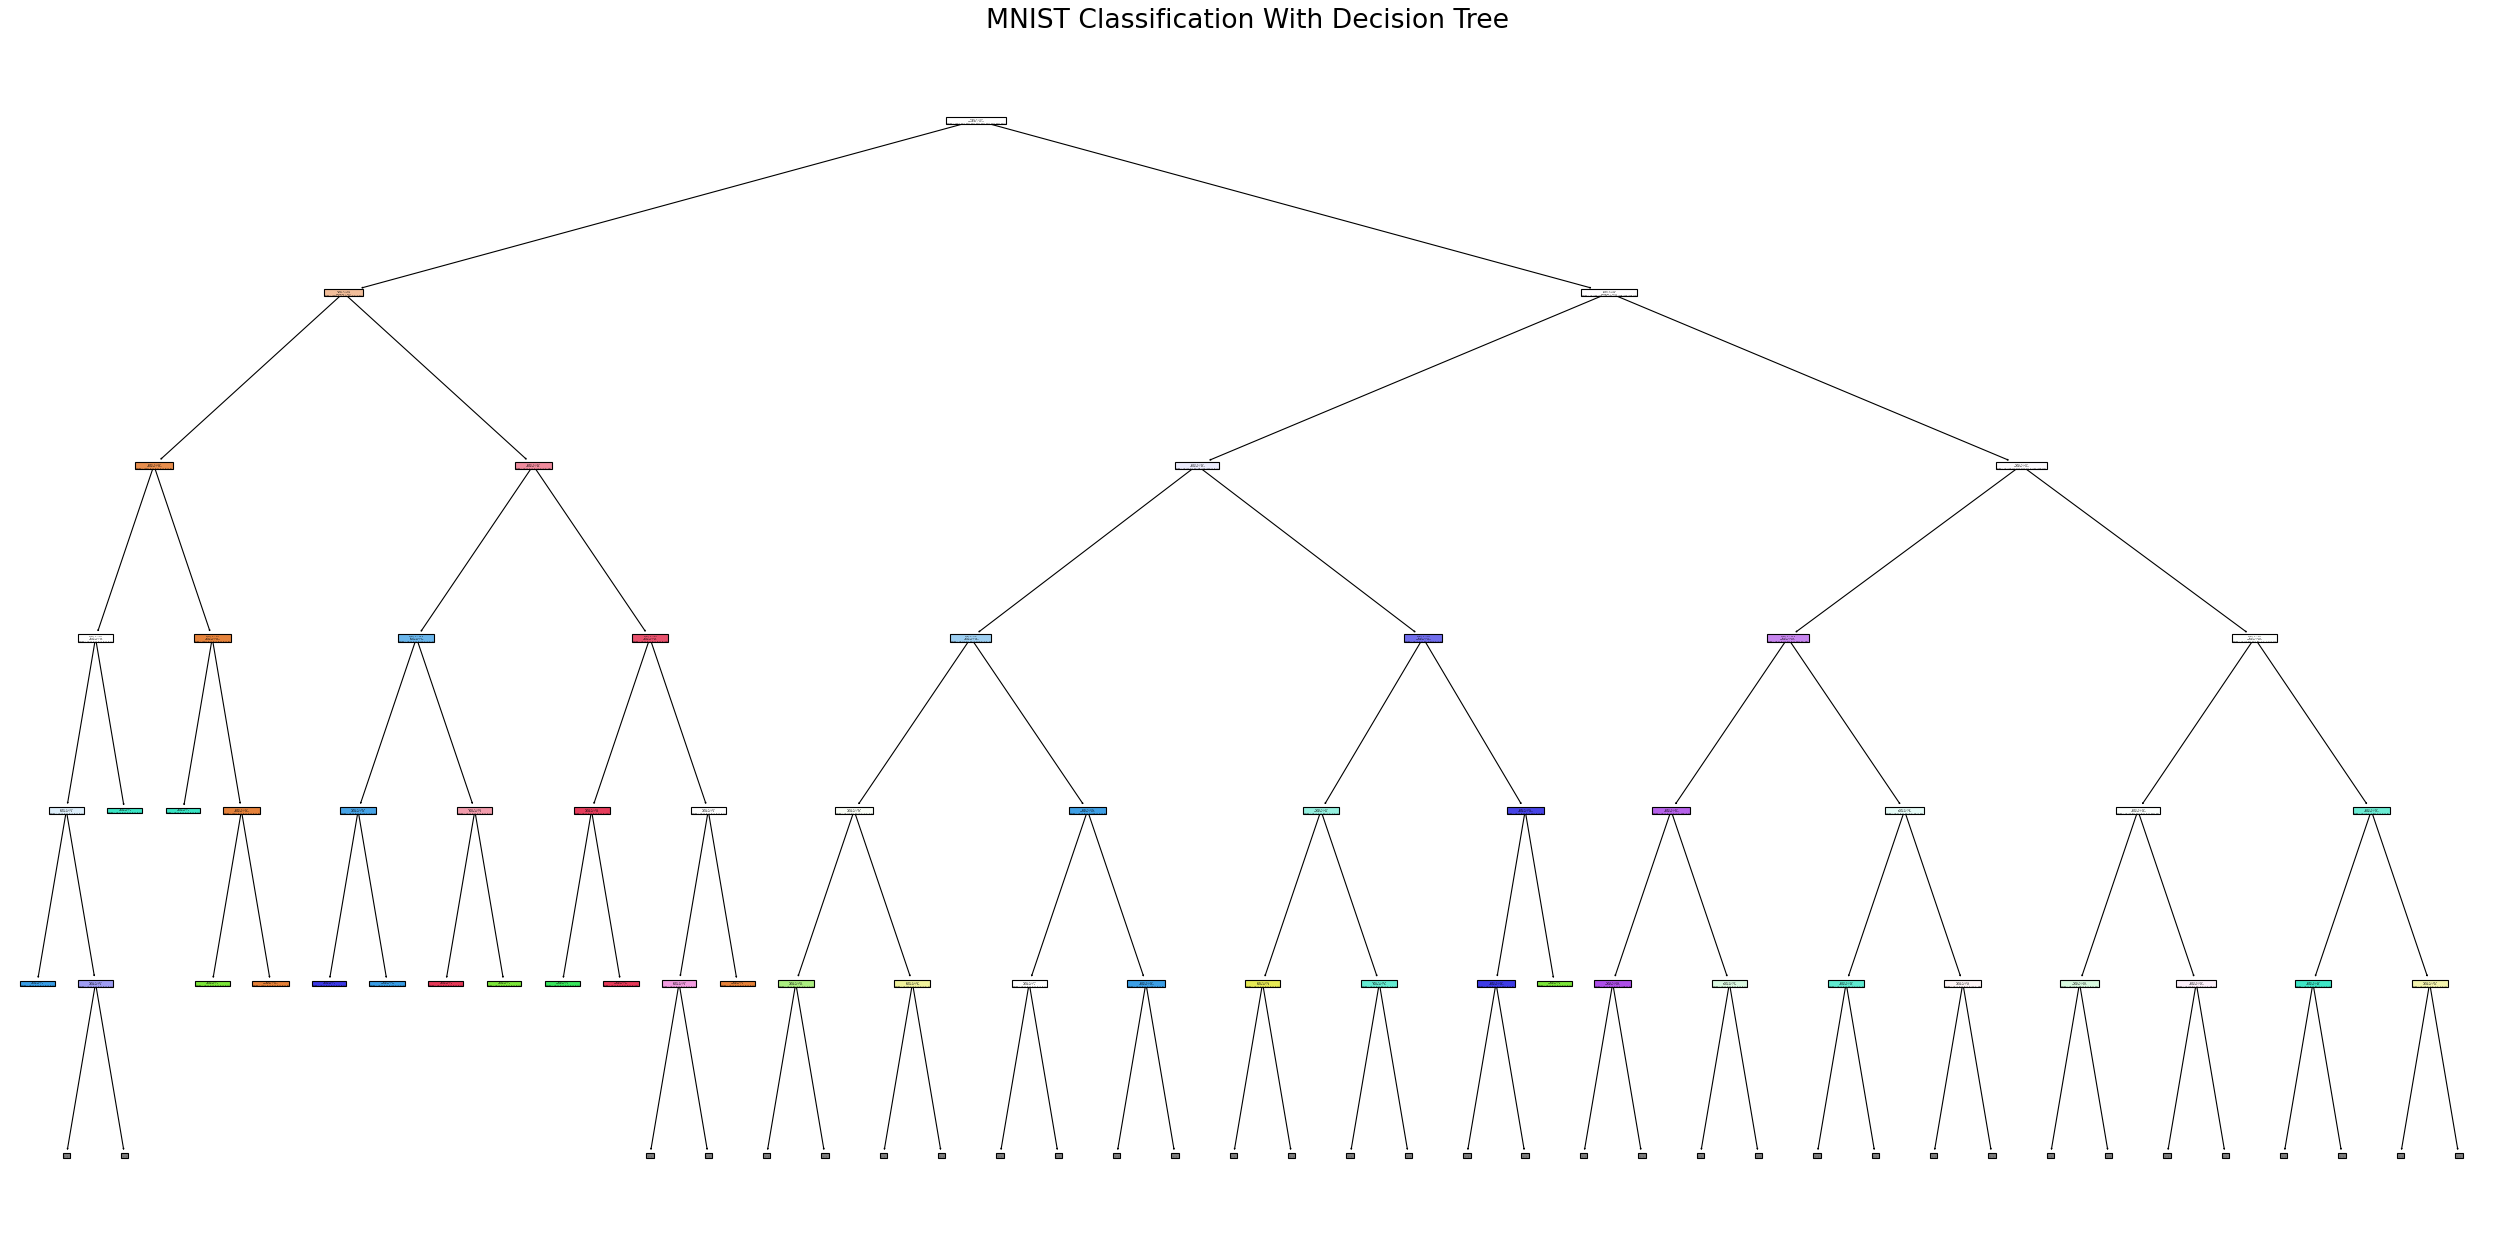

In [5]:
# Create a CART classifier
# scikit-learn uses an optimised version of the CART algorithm.
# ref.https://scikit-learn.org/0.15/modules/tree.html
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


# Plot the decision tree
plt.figure(figsize=(40,20), dpi=80)
plot_tree = tree.plot_tree(dt_clf, max_depth=5, filled=True)
plt.title("MNIST Classification With Decision Tree", fontsize=24)
plt.show()

In [6]:
# Prediction
predict_y = dt_clf.predict(X_test)

In [7]:
# Model Evaluation
accuracy = accuracy_score(predict_y, y_test)
matrix = precision_recall_fscore_support(y_test, predict_y, average='weighted')
print("""Accuracy = {0:.4f}
Precision = {1:.4f}
Recall = {2:.4f}
F-Score = {3:.4f}
""".format(accuracy, matrix[0], matrix[1], matrix[2]))

Accuracy = 0.8378
Precision = 0.8436
Recall = 0.8378
F-Score = 0.8386

